(927, 60, 1) (927, 1)
927/927 - 25s - loss: 0.0036 - 25s/epoch - 26ms/step
8/8 [==============================] - 1s 10ms/step
5.253597720177276


C:\Users\HP\AppData\Local\Temp\ipykernel_3508\873239853.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


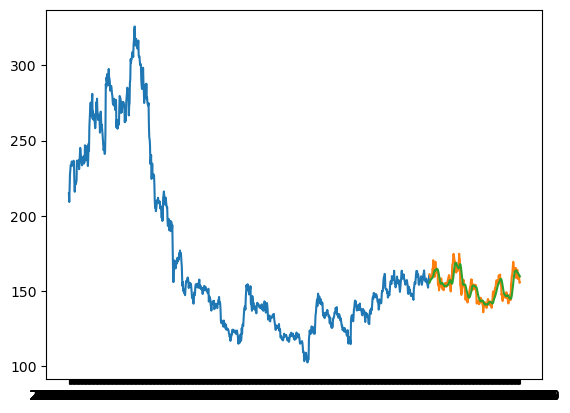

In [1]:
# Using the LSTM
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Creating Data frame
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
data = df.sort_index()
new_data = pd.DataFrame(index = range(0,len(df)), columns = ['Date','Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
# Setting the index
new_data.index = new_data.Date
new_data.drop('Date', axis =1, inplace =True)

# Creating train and test sets
dataset = new_data.values

train = dataset[0:987]
valid = dataset[987:]

# Converting Dataset into x_train and y_train adn Normalising the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [],[]

for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i])
    y_train.append(scaled_data[i])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape,y_train.shape)

#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#print(x_train.shape,y_train.shape)

# Creating and Fitting the LSTM Network
model = Sequential()
# return sequences = true means it will return the complete sequence, not the only last value
model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],1)))
# We are using two LSTMs in which first one will return the whole sequences for each time input and the second one will return the final output value after processing the above returned sequence
model.add(LSTM(units=50))
# here 1 describes the no of dimensions of the output value
model.add(Dense(1))
# This compile method is configuring the model for training, says we will use metric of MSE for error calculations and updating of weights will be done by Adam optimizer
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
# this .fit() method fits the training data into the compiled model. epoch = number of iterations on the training dataset
# batch_size is the number of samples that will be used in updating teh model weights each time
# verbose = amount of info printed during training
model.fit(x_train, y_train, epochs =1, batch_size =1, verbose =2)

# predicting 246 values using the past 60 from the train data
inputs = new_data[(len(new_data) - len(valid) -60):].values
inputs.reshape(-1,1)
#print(inputs)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])




In [2]:
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
data = df.sort_index()
new_data = pd.DataFrame(index = range(0,len(df)), columns = ['Date','Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
# Setting the index
new_data.index = new_data.Date
new_data.drop('Date', axis =1, inplace =True)

# Creating train and test sets
dataset = new_data.values

train = dataset[0:987]
valid = dataset[987:]

In [3]:
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

8/8 [==============================] - 0s 11ms/step
5.253597720177276


In [4]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [5]:
valid

array([[161.25],
       [160.25],
       [158.8],
       [158.85],
       [159.35],
       [159.0],
       [159.65],
       [160.3],
       [164.75],
       [164.45],
       [170.6],
       [168.6],
       [164.85],
       [161.6],
       [159.45],
       [167.2],
       [169.55],
       [167.4],
       [162.55],
       [165.2],
       [164.6],
       [162.25],
       [162.2],
       [154.25],
       [155.4],
       [153.9],
       [150.5],
       [153.1],
       [152.95],
       [155.45],
       [155.45],
       [157.1],
       [158.5],
       [156.5],
       [154.4],
       [152.1],
       [151.15],
       [154.45],
       [151.9],
       [150.65],
       [154.15],
       [153.8],
       [154.9],
       [155.5],
       [154.3],
       [153.5],
       [152.9],
       [155.2],
       [153.5],
       [156.55],
       [156.8],
       [158.7],
       [159.2],
       [160.65],
       [160.35],
       [157.2],
       [153.75],
       [151.8],
       [149.8],
       [155.45],
       [154.95]